# What is Outlier Analysis?

We have to apply certain preprocessing methods to make the data we have ready for machine learning. One of these methods is the analysis of outliers. An outlier is any data point that differs substantially from the rest of the observations in a data set. In other words, it is an observation that goes beyond the general trend. Outliers can seriously affect our analysis results and statistical modelling. Outliers behave differently from other data models and they increase the error by overfitting, so it is necessary to detect the outlier model and perform some actions on it.

![](http://www.advancedsciencenews.com/wp-content/uploads/2018/09/gb_001.jpg)

# Types of Outliers:

Outliers can also be classified as univariate or multivariate. Univariate outliers occur in a single variable, while multivariate outliers occur as an unusual combination with at least 2 different variables in one observation. The choice of the method to be used in the detection of outliers depends on the volume, distribution and number of variables of the data.

The methods to be used to detect outliers can be divided into different groups according to the number of variables as univariate, multivariate, parametric according to their distribution (a distribution or non-parametric tests (independent of any distribution) and statistical or graphical methods.


**1) Univariate**

It can be determined by methods such as Interquartile Range (IQR), Z-Score, Median Absolute Deviation method and Hampel filter.

**2) Multivariate**

It can be detected by methods such as DBScan, Isolation Forest.

Let's understand this with an example. Let's say we understand the relationship between height and weight. Below is our univariate and bivariate distribution for Height, Weight. Take a look at the box plots. We don't have any outliers (most common method of 1.5*IQR above). Now look at the distribution area. Here, in a given weight and height segment, there are two values below and one above average.

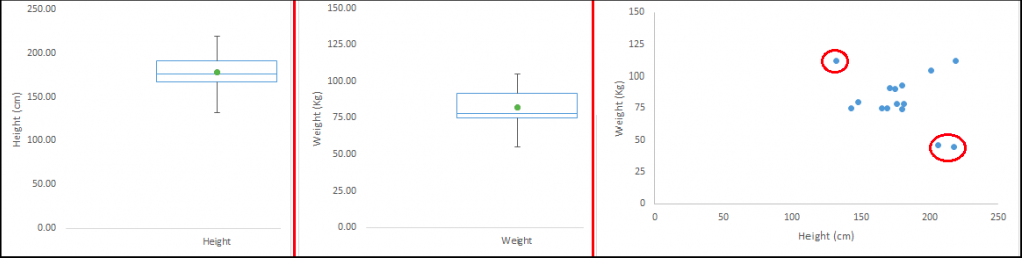

**1. Parametric methods: Univariate**

    1.1. Standard Deviation
    
    1.2. IQR
    
**2. Nonparametric methods: Univariate**

    2.1. Isolation Forest
    
**3. Parametric methods: Multivariate**

    3.1. EllipticEnvelope
    
**4. Nonparametric methods: Multivariate**

    4.1. DBSCAN
    
    4.2. LocalOutlierFactor

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import missingno as msno

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score, precision_score,recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate 
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Monitoring Adjustments

In [2]:
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", 500) 
pd.set_option("display.float_format", lambda x: "%.3f" % x) 
pd.set_option("display.width", 170) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 700) 
warnings.simplefilter(action='ignore', category=Warning)

# Reading CSV File

In [3]:
#df_ = pd.read_csv("../input/building-permit-applications-data/Building_Permits.csv")
#df = df_.copy()
#df.head()

# 1. Parametric methods: Univariate

**1.1. Standard Deviation**

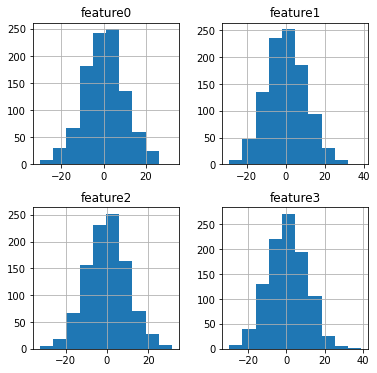

In [4]:
# seed for reproducibility
np.random.seed(42)
n_feats=4
dummydf = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
                           columns=['feature{}'.format(i) for i in range(n_feats)])
# all normally distributed
dummydf.hist(figsize=(6,6));

In [5]:
# enough variation between features to show outliers
dummydf.describe()

,feature0,feature1,feature2,feature3
count,1000.000,1000.000,1000.000,1000.000
mean,0.306,0.248,-0.083,0.301
std,9.639,10.119,10.061,10.070
min,-30.195,-28.963,-32.413,-29.911
25%,-6.129,-6.770,-6.753,-6.709
50%,0.562,0.202,-0.075,0.212
75%,6.649,6.939,6.423,6.959
max,32.431,38.527,31.521,39.262


In [6]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

**1.2. IQR Method**

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [7]:
import pandas as pd
import numpy as np
#train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train = pd.read_csv('../input/housepricesadvancedregressiontechniquestrain/train.csv')

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['LotArea'])

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


print(outlier_thresholds(train,'LotArea'))

(-17822.474999999995, 38535.325)


In [9]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if low_limit < 0:
            low_limit = 0
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


replace_with_thresholds(train,'LotArea')

train[train['LotArea'] == 38535.325]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.000,38535.325,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.000,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.000,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
249,250,50,RL,NaN,38535.325,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.000,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.000,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
271,272,20,RL,73.000,38535.325,Pave,NaN,IR1,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,7,1954,2005,Flat,Membran,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,Gd,LwQ,226,GLQ,1063,96,1385,GasA,Ex,Y,SBrkr,1363,0,0,1363,1,0,1,0,2,1,TA,5,Mod,2,TA,Attchd,1954.000,Unf,2,439,TA,TA,Y,81,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
313,314,20,RL,150.000,38535.325,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.000,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,38535.325,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.000,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
384,385,60,RL,NaN,38535.325,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,Av,GLQ,985,Unf,0,595,1580,GasA,Ex,Y,SBrkr,1079,874,0,1953,1,0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.000,Fin,2,501,TA,TA,Y,216,231,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
451,452,20,RL,62.000,38535.325,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.000,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
457,458,20,RL,NaN,38535.325,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.000,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
523,524,60,RL,130.000,38535.325,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.000,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
661,662,60,RL,52.000,38535.325,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidg

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10072.055,5118.484,1300.000,7553.500,9478.500,11601.500,38535.325
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


**1.3. Compare Standard Deviation and IQR**

In [11]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [12]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = out_std(dummydf['feature0'], nstd=3.0)
# first 10 elements
outlier_mask[:10]

[False, False, False, False, False, False, False, False, False, False]

In [13]:
dummydf['feature0'][outlier_mask]

506   -30.195
788   -29.070
929    32.431
Name: feature0, dtype: float64

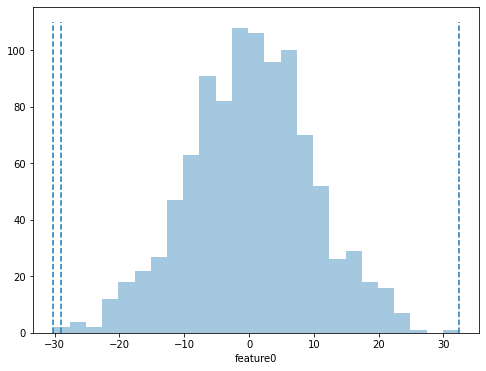

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

**Standard Deviation VS. IQR**

In [15]:
# For comparison, make one array each using standard deviations of 2.0, 3.0 and 4.0.
std2 = dummydf.apply(out_std, nstd=2.0)
std3 = dummydf.apply(out_std, nstd=3.0)
std4 = dummydf.apply(out_std, nstd=4.0)

# For comparison, make one array each at varying values of k.
iqr1 = dummydf.apply(out_iqr, k=1.5)
iqr2 = dummydf.apply(out_iqr, k=2.0)
iqr3 = dummydf.apply(out_iqr, k=3.0)

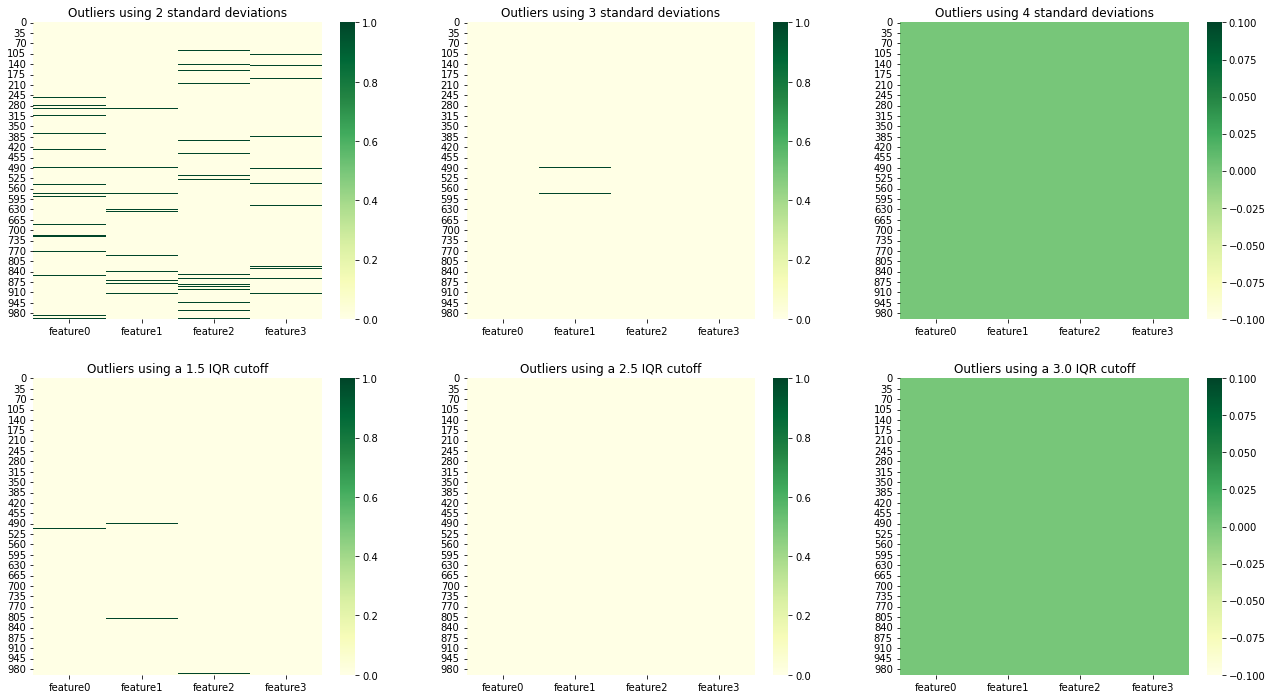

In [16]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(22, 12));
ax1.set_title('Outliers using 2 standard deviations');
ax2.set_title('Outliers using 3 standard deviations');
ax3.set_title('Outliers using 4 standard deviations');
ax4.set_title('Outliers using a 1.5 IQR cutoff');
ax5.set_title('Outliers using a 2.5 IQR cutoff');
ax6.set_title('Outliers using a 3.0 IQR cutoff');

sns.heatmap(std2, cmap='YlGn', ax=ax1);
sns.heatmap(std3, cmap='YlGn', ax=ax2);
sns.heatmap(std4, cmap='YlGn', ax=ax3);
sns.heatmap(iqr1, cmap='YlGn', ax=ax4);
sns.heatmap(iqr2, cmap='YlGn', ax=ax5);
sns.heatmap(iqr3, cmap='YlGn', ax=ax6);

plt.savefig('outliers.png') # testing control of newsfeed figure: https://www.kaggle.com/questions-and-answers/57099#post330539
plt.show()

In [17]:
def plot_cutoff(dataframe, col, nstd=2.0, color='red'):
    """
    Version 8 update: more generic function.
    Function added in Version 6, more readable code than previous versions.
    From version 4 update: 
    This code block will plot lower and upper thresholds.
    I'm still thinking about how to best visualize this, suggestions welcome!
    """
    lower, upper = out_std(dataframe[col], nstd=nstd, return_thresholds=True)
    plt.axvspan(min(dataframe[col][dataframe[col] < lower], default=dataframe[col].min()), lower, alpha=0.2, color=color);
    plt.axvspan(upper, max(dataframe[col][dataframe[col] > upper], default=dataframe[col].max()), alpha=0.2, color=color);

# 2. Nonparametric methods: Univariate

In [18]:
df = pd.read_csv('../input/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [19]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [20]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [21]:
df.fillna(df.median(), inplace = True)
df_num = df.select_dtypes (include = ["float64", "int64"])

In [22]:
cols = df_num.columns.tolist()
df[cols].dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

**2.1. Isolation Forest**

In [23]:
for i, column in enumerate(cols):
#     print (i, column)
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

In [24]:
# for this exercise, just fill missing values with the median value for a column.
# Using median ensures filled values will be whole numbers.
df.fillna(df.median(), inplace=True)

In [25]:
cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

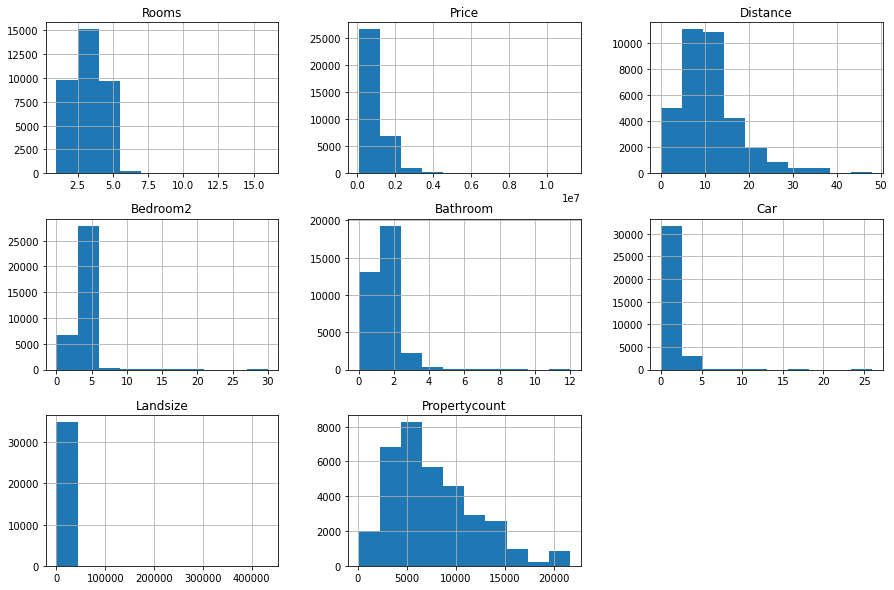

In [26]:
df[cols].hist(figsize=(15,10));

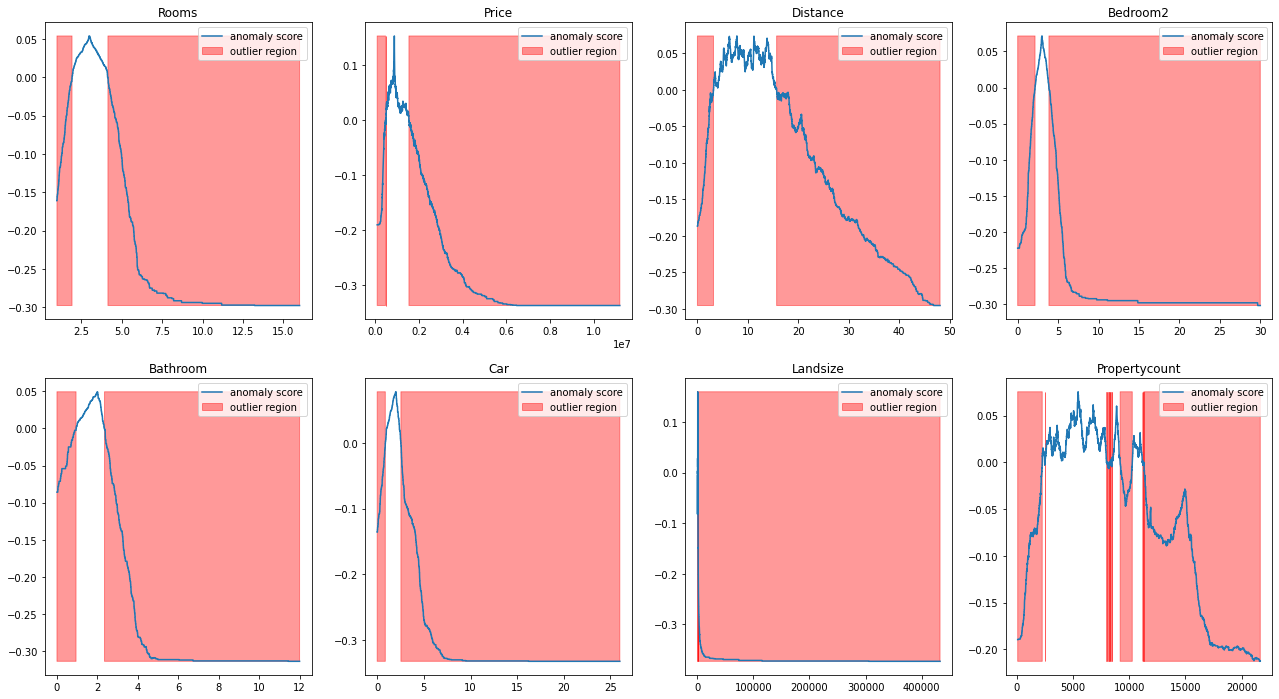

In [27]:
fig, axs = plt.subplots(2, 4, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# 3. Parametric methods: Multivariate

**3.1. EllipticEnvelope**

In [28]:
#Set the path of the dataset and read the dataset
df_breast= pd.read_csv('../input/breast-cancer-wisconsin-benign-or-malignant/tumor.csv')
# Cleaning teh data and replacing ? with a 0
df_breast['Bare Nuclei'] = df_breast['Bare Nuclei'].replace('?', 0)

In [29]:
df_breast.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
dataset_ee = df_breast
dataset_ee.loc[dataset_ee['Class'] == 4, 'target'] = -1
dataset_ee.loc[dataset_ee['Class'] == 2, 'target'] = 1
X = dataset_ee.drop(columns='target', axis=1)
y = dataset_ee['target']

In [31]:
#Creating train and test  data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=2021)
X_test = X_test.reset_index()
X_train = X_train.reset_index()
y_train = y_train.to_frame().reset_index()
y_test = y_test.to_frame().reset_index()
X_train.drop(columns='index', axis=1, inplace=True)
X_test.drop(columns='index', axis=1, inplace=True)
y_train.drop(columns='index', axis=1, inplace=True)
y_test.drop(columns='index', axis=1, inplace=True)
dataset_test= X_test.copy()
dataset_test['target']=y_test

In [32]:
model_ee = EllipticEnvelope(contamination=0.3)

In [33]:
model_ee.fit(X_train, y_train)
y_pred_ee = model_ee.predict(X_test)

In [34]:
ee_anom_index = np.where(y_pred_ee == -1)
ee_anom_index= np.array(ee_anom_index).tolist()
dataset_test['ee_anomaly']=y_pred_ee
dataset_test.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,target,ee_anomaly
0,1181685,1,1,2,1,2,1,2,1,1,2,1.000,1
1,1197270,3,1,1,1,2,1,3,1,1,2,1.000,1


In [35]:
cm=confusion_matrix(dataset_test['target'], dataset_test['ee_anomaly'])
print(" Accuracy Score for Elliptic Envelope :", accuracy_score(dataset_test['target'], dataset_test['ee_anomaly']))
print(" Precision for Elliptic Envelope :", precision_score(dataset_test['target'], dataset_test['ee_anomaly']))
print(" Recall for Elliptic Envelope :", recall_score(dataset_test['target'], dataset_test['ee_anomaly']))
print(" Confusion Matrix: \n", cm)

 Accuracy Score for Elliptic Envelope : 0.9365853658536586
 Precision for Elliptic Envelope : 0.9323308270676691
 Recall for Elliptic Envelope : 0.96875
 Confusion Matrix: 
 [[ 68   9]
 [  4 124]]


In [36]:
pca= PCA(n_components=3)
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)
X_reduced=pca.fit_transform(X)

In [37]:
original_anomaly_index=dataset_test.loc[dataset_test['target']==-1]
original_anomaly_index=list(original_anomaly_index.index)

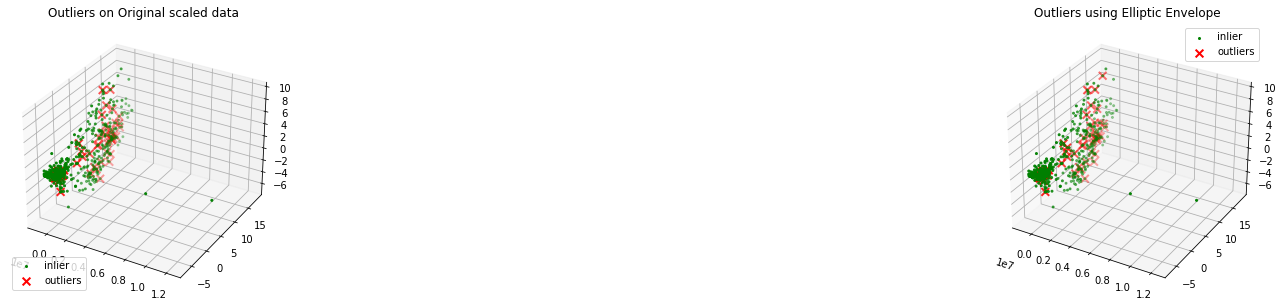

In [38]:
fig=plt.figure(figsize=(25, 5))
ax= fig.add_subplot(131, projection='3d')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green", marker="o")
ax.scatter(X_reduced[original_anomaly_index,0],X_reduced[original_anomaly_index,1], zs=X_reduced[original_anomaly_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc='lower left')
plt.title('Outliers on Original scaled data')
ax= fig.add_subplot(133, projection='3d')
plt.title('Outliers using Elliptic Envelope')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green")
ax.scatter(X_reduced[ee_anom_index,0],X_reduced[ee_anom_index,1], zs=X_reduced[ee_anom_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()

# 4. Nonparametric methods: Multivariate

**4.1. DBSCAN**

In [39]:
df = pd.read_csv('../input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.fillna(df.median(), inplace = True)

In [40]:
# scale data first
X = StandardScaler().fit_transform(df[cols].values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [41]:
pd.Series(labels).value_counts()

 0    34797
-1       60
dtype: int64

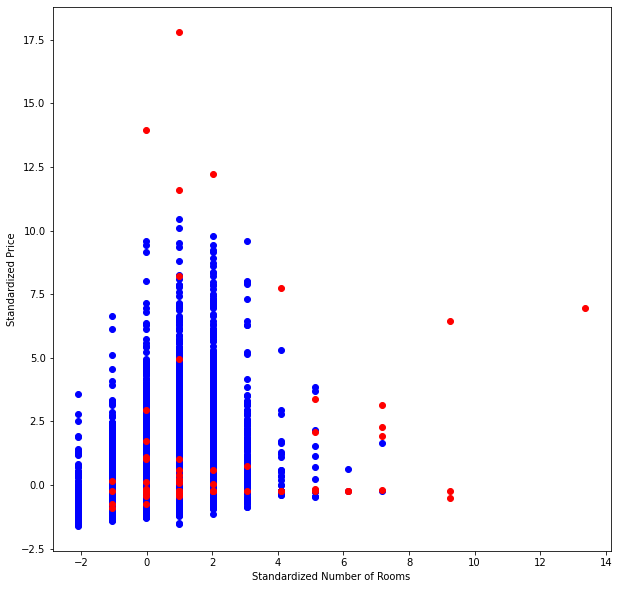

In [42]:
plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Standardized Number of Rooms');
plt.ylabel('Standardized Price');

**4.2. Local Outlier Factor (LOF)**

Novelty detection with Local Outlier Factor (LOF)
The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for novelty detection. Note that when LOF is used for novelty detection you MUST not use predict, decision_function and score_samples on the training set as this would lead to wrong results. You must only use these methods on new unseen data (which are not in the training set). See User Guide : for details on the difference between outlier detection and novelty detection and how to use LOF for outlier detection.

The number of neighbors considered, (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

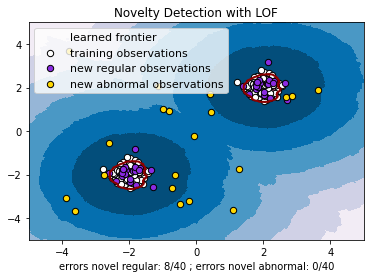

In [43]:
np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate new normal (not abnormal) observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the learned frontier, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')


s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers))
plt.show()

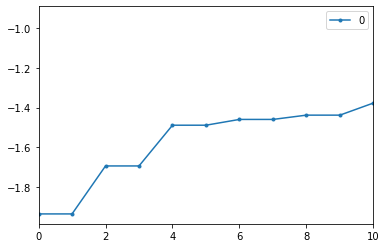

In [44]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(X_train)
df_scores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim = [0,10], style='.-')
plt.show()

In [45]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(X_train)
df_scores = lof.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
for i in range(0,len(scores)):
    if  scores[0][i] < (scores[0][i+1] * 1.03):
        continue
    else:
        th = scores[0][i+1]
        break
print(i)
print(th)

0
-1.9332172688471636


In [46]:
X_train[df_scores < th]

array([], shape=(0, 2), dtype=float64)

In [47]:
X_train[df_scores < th].shape

(0, 2)